In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1.Explore the data and calculate statistical measure of the data**

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

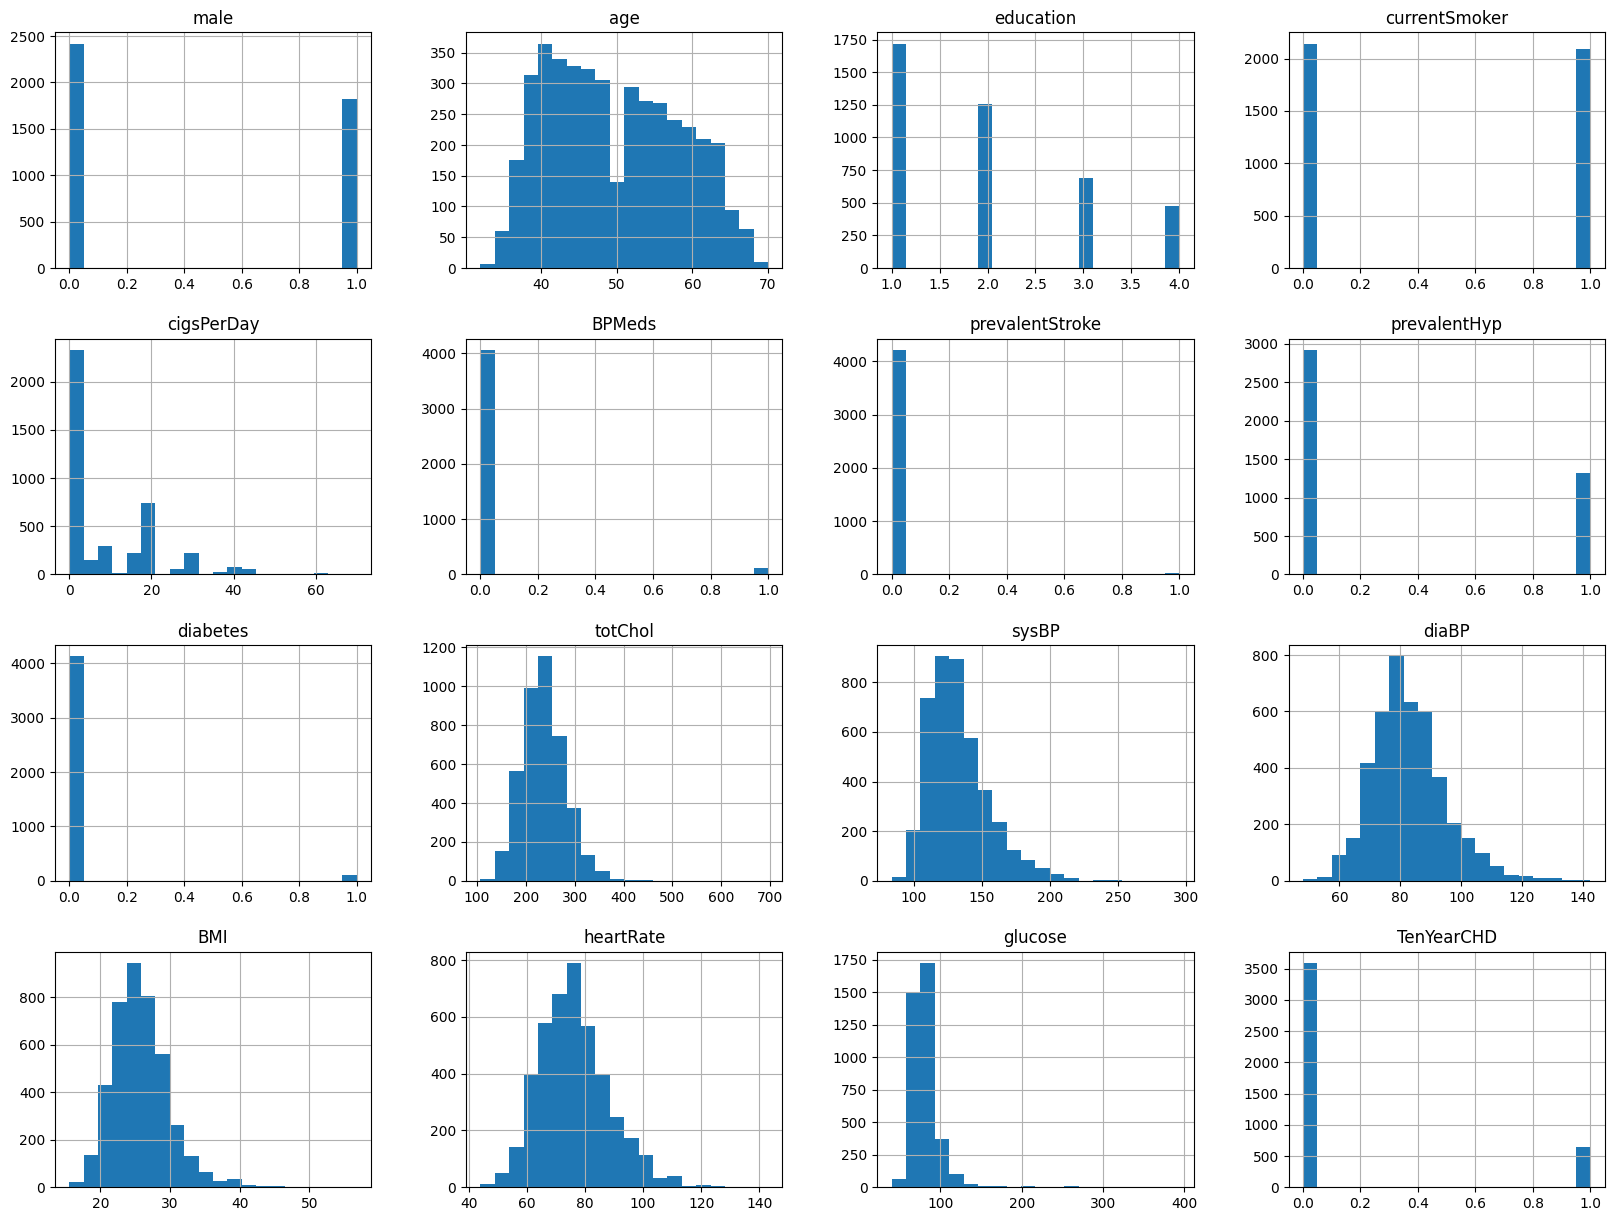

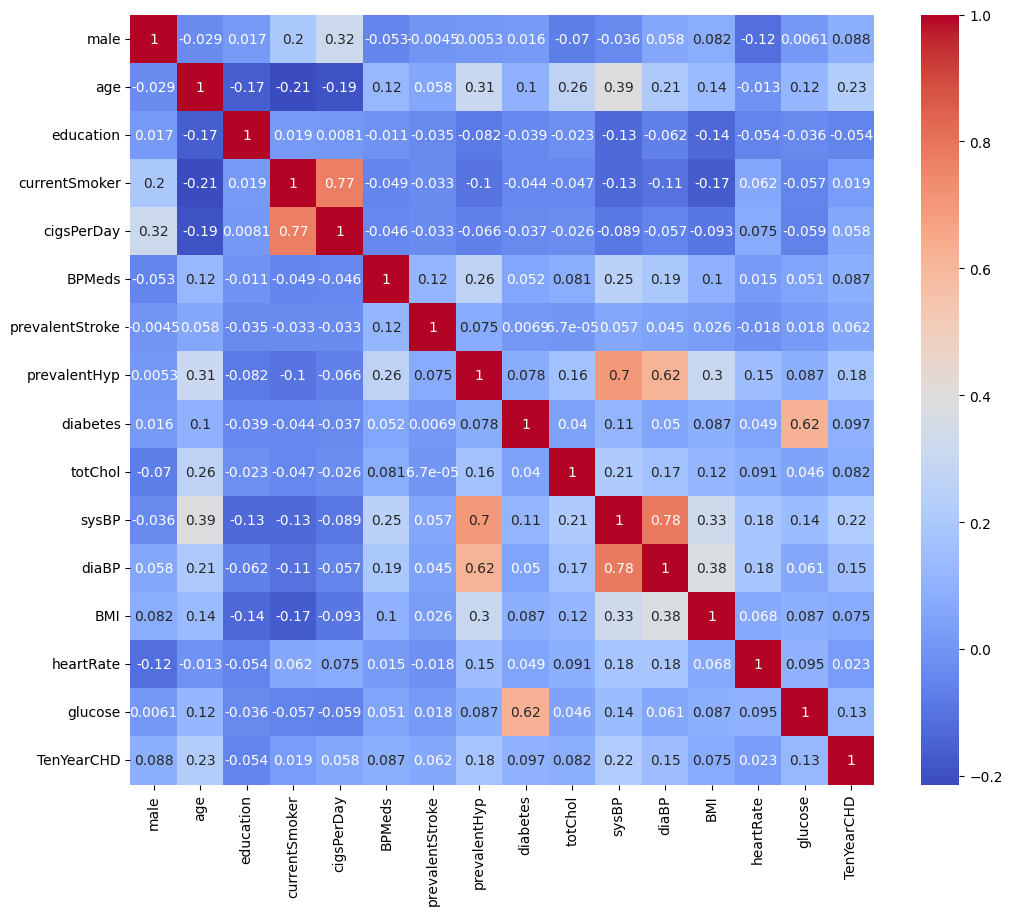

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('framingham.csv')


print(data.head())

print(data.describe())

print(data.isnull().sum())

data.hist(bins=20, figsize=(20, 15))
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


2: Identify the algorithm

1.Logistic Regression: A simple and interpretable model that works well for binary classification problems.

2.Decision Trees: A model that splits the data into branches to make predictions. It's easy to interpret but can overfit.

3.Random Forest: An ensemble method that uses multiple decision trees to improve accuracy and reduce overfitting.

4.Support Vector Machine (SVM): A powerful model for classification tasks, especially with a clear margin of separation.

5.Gradient Boosting Machines (e.g., XGBoost, LightGBM): Ensemble methods that build models sequentially to improve performance.



**3: Preprocess the data**

In [52]:
df.shape

(4238, 15)

In [35]:
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [36]:
df.isnull().sum()



,0
male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


In [37]:
df.fillna(df.mean(), inplace=True)

In [39]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [40]:
from sklearn.model_selection import train_test_split

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**4: Create at least three different ML algorithm models**

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)


RandomForestClassifier()

In [42]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)


SVC()

In [45]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**5: Evaluate precision recall and F1 score**

In [46]:
from sklearn.metrics import classification_report

y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

y_pred_svm = svm.predict(X_test)
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.50      0.04      0.07       124

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.50       848
weighted avg       0.81      0.85      0.80       848

Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       724
           1       0.45      0.07      0.12       124

    accuracy                           0.85       848
   macro avg       0.66      0.53      0.52       848
weighted avg       0.80      0.85      0.80       848

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg  

6: Perform the comparative analysis between the models and select the best model. Mention the reason why you are selecting the model.

choose Random Forest over Logistic Regression and SVM if:

Your data has complex, non-linear relationships.

You want a model that is robust to outliers and noise.

You require feature importance metrics.

You are dealing with large datasets and need a scalable solution.

You have missing data or suspect the presence of irrelevant features.



**7: Save the model**

In [53]:
import joblib

joblib.dump(rf, 'random_forest_model1.pkl')


['random_forest_model1.pkl']

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

df = pd.read_csv('framingham.csv')

df = df.drop('education', axis=1)

print(df.columns)

if 'sex' in df.columns:
    df['sex'] = df['sex'].map({'male': 1, 'female': 0})
elif 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})



X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()

X_train = X_train.dropna()
y_train = y_train[X_train.index]

rf.fit(X_train, y_train)

joblib.dump(rf, 'random_forest_model.pkl')

joblib.dump(X_train.columns, 'model_columns2.pkl')

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


['model_columns2.pkl']